In [187]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
#matplotlib inline


In [189]:
## input data
data = pd.read_csv("data/A_BIG.csv", sep=";")
data["dates"]

data['ddate'] = pd.to_datetime(data['dates'], format='%d/%m/%Y')
#data['date'] = pd.to_datetime(data.date + data.h.astype(str),format='%d/%m/%Y %H').dt.time
#data['date']
data['time'] =data['h'].astype(str) +':'+ data['min'].astype(str)+':'+data['sec'].astype(str)
data['date'] = pd.to_datetime(data['ddate'].astype(str) +' '+ data['time'].astype(str))


## set index
data = data.set_index(['date'])
data
## convert and make index to dataframwe
#time_data = "3/4/2022 12:16:25.123"
#format_data = "%d/%m/%Y"
#date = datetime.strptime(data['dates'], format_data)
#data


,code,X,Y,Z,Hz,V,S,hsta,htarg,dates,h,min,sec,ddate,time
date,,,,,,,,,,,,,,,
2022-04-03 10:14:35.870,A1,126.2513,110.7523,18.8394,75.2515,84.1735,29.2678,1.638,0,3/4/2022,10,14,35.87,2022-04-03,10:14:35.87
2022-04-03 10:14:36.250,A2,126.2504,110.7518,18.8394,75.2519,84.1729,29.2668,1.638,0,3/4/2022,10,14,36.25,2022-04-03,10:14:36.25
2022-04-03 10:14:36.840,A3,126.2504,110.7518,18.8394,75.2518,84.1730,29.2668,1.638,0,3/4/2022,10,14,36.84,2022-04-03,10:14:36.84
2022-04-03 10:14:37.350,A4,126.2494,110.7515,18.8391,75.2516,84.1731,29.2658,1.638,0,3/4/2022,10,14,37.35,2022-04-03,10:14:37.35
2022-04-03 10:14:38.520,A5,126.2495,110.7514,18.8389,75.2520,84.1734,29.2658,1.638,0,3/4/2022,10,14,38.52,2022-04-03,10:14:38.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-03 10:32:11.740,A1800,126.2506,110.7509,18.8397,75.2539,84.1722,29.2668,1.638,0,3/4/2022,10,32,11.74,2022-04-03,10:32:11.74
2022-04-03 10:32:12.300,A1801,126.2506,110.7509,18.8396,75.2539,84.1724,29.2668,1.638,0,3/4/2022,10,32,12.30,2022-04-03,10:32:12.3
2022-04-03 10:32:12.880,A1802,126.2506,110.7508,18.8398,75.2541,84.1719,29.2668,1.638,0,3/4/2022,10,32,12.88,2022-04-03,10:32:12.88


In [190]:
temp = data['Z']
N = len(temp)
temp

date
2022-04-03 10:14:35.870    18.8394
2022-04-03 10:14:36.250    18.8394
2022-04-03 10:14:36.840    18.8394
2022-04-03 10:14:37.350    18.8391
2022-04-03 10:14:38.520    18.8389
                            ...   
2022-04-03 10:32:11.740    18.8397
2022-04-03 10:32:12.300    18.8396
2022-04-03 10:32:12.880    18.8398
2022-04-03 10:32:13.500    18.8398
2022-04-03 10:32:14.030    18.8398
Name: Z, Length: 1804, dtype: float64

Text(0, 0.5, 'DX')

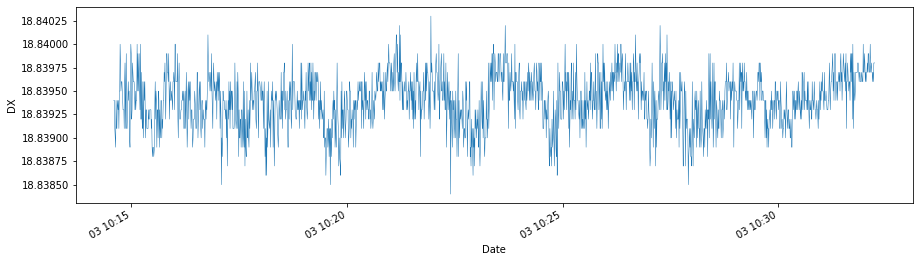

In [191]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
temp.plot(ax=ax, lw=.5)
#ax.set_ylim(-10, 40)
ax.set_xlabel('Date')
ax.set_ylabel('DX')

In [204]:
tempa=np.array(temp)
temp_fft = sp.fftpack.fft(tempa)
temp_psd = np.abs(temp_fft) ** 2

fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 601.)
fftfreq

i = fftfreq > 0
print(fftfreq)

[ 0.          0.33314856  0.66629712 ... -0.99944568 -0.66629712
 -0.33314856]


Text(0, 0.5, 'PSD (dB)')

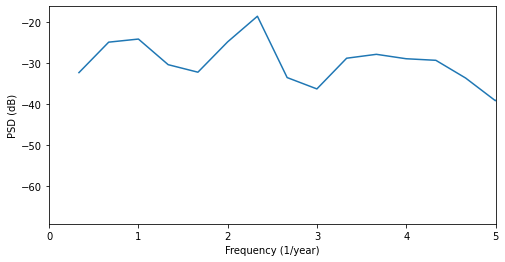

In [208]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
ax.set_xlim(0, 5)
ax.set_xlabel('Frequency (1/year)')
ax.set_ylabel('PSD (dB)')

In [213]:
temp_fft_bis = temp_fft.copy()
temp_fft_bis[np.abs(fftfreq) > 2. ] = 0

Text(0, 0.5, 'Displ (m)')

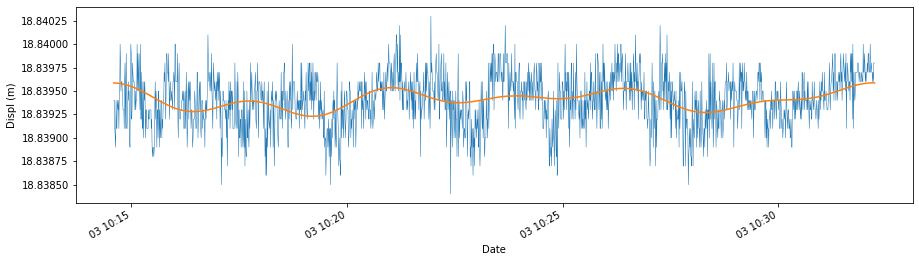

In [214]:
date= pd.to_datetime(data.index)
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))

fig, ax = plt.subplots(1, 1, figsize=(15, 4))
temp.plot(ax=ax, lw=.5)
ax.plot_date(date, temp_slow, '-')
#ax.set_xlim(datetime.date(1994, 1, 1),
#            datetime.date(2000, 1, 1))
#ax.set_ylim(18.838, 18.841)
ax.set_xlabel('Date')
ax.set_ylabel('Displ (m)')